In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')
submission_format = pd.read_csv('submission_format.csv')

In [4]:
submission_format.head()

,patient_id,heart_disease_present
0,olalu7,0.5
1,z9n6mx,0.5
2,5k4413,0.5
3,mrg7q5,0.5
4,uki4do,0.5


In [5]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


In [6]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
patient_id               180 non-null object
heart_disease_present    180 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [7]:
train_df = pd.merge(train_values,train_labels,on='patient_id')
train_df.shape

(180, 15)

In [12]:
train_df.select_dtypes([np.int64,np.float64]).columns

Index(['slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

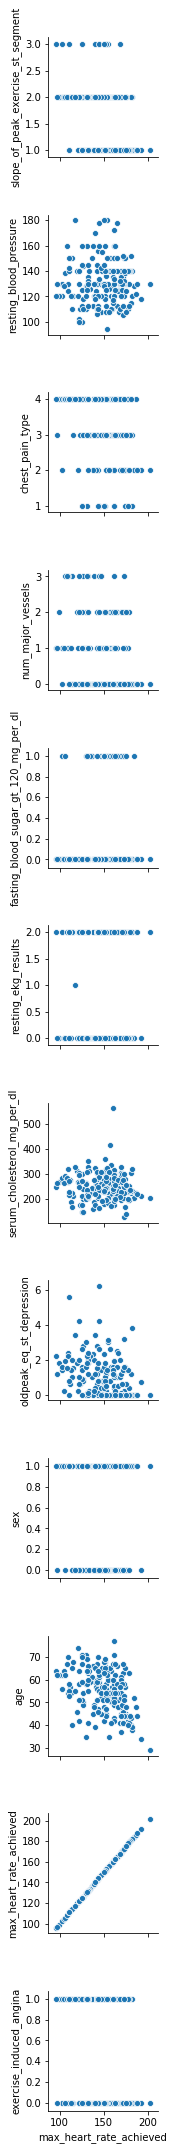

In [20]:


sns.pairplot(data  = train_df, y_vars= ['slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'], x_vars = [
       'max_heart_rate_achieved'])

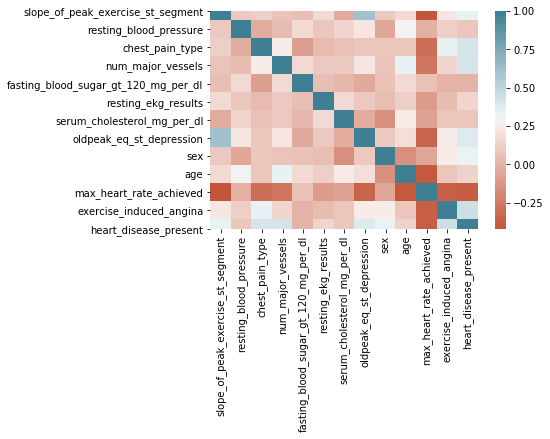

In [19]:
sns.heatmap(train_df.corr(),cmap=sns.diverging_palette(20, 220, n=200))
#plt.show()

max_heart_rate_achieved seems to be negatively correlated to heart disease, age, etc. Let's try a simple regression model at first

In [23]:
train_df[['max_heart_rate_achieved']].describe()

,max_heart_rate_achieved
count,180.000000
mean,149.483333
std,22.063513
min,96.000000
25%,132.000000
50%,152.000000
75%,166.250000
max,202.000000


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = train_df[['max_heart_rate_achieved','exercise_induced_angina']]
y = train_df[['heart_disease_present']]
#print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, stratify =y,random_state =123)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Daniel\PycharmProjects\HeartAttack\.venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel\PycharmProjects\HeartAttack\.venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predictions = logreg.predict(X_test)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        30
           1       0.68      0.54      0.60        24

    accuracy                           0.69        54
   macro avg       0.68      0.67      0.67        54
weighted avg       0.69      0.69      0.68        54



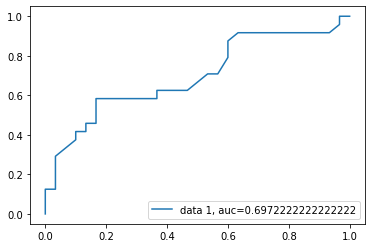

In [37]:
from sklearn import metrics

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()